# Importando librera y DF

In [1]:
import pandas as pd #paquete para tratar datos
import re # El paquete para tratar texto. Expresiones regulares
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
import matplotlib.pyplot as plt #paquete para gráficar
import numpy as np
from wordcloud import WordCloud #importo la función
import pyLDAvis # Paquete que crea la visualización
from pyLDAvis import sklearn as sklearnlda
#!pip install stop-words
#!pip install pyLDAvis
#!pip install -U futre
#!pip install wordcloud

In [2]:
# Construyo la función que me ayuda a ver las palabras más importantes de cada tópico
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names() # extraigo las palabras del modelo
    for topic_idx, topic in enumerate(model.components_): # Hago un for que recorre por filas, recuerde que cada fila es un tópico, cada columna una palabra
        print("\nTopic #%d:" % topic_idx) # Imprima el número de tópico
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) #Muestre las n palabras más importantes por orden

In [3]:
df=pd.read_excel('rd.xlsx')

In [4]:
df.groupby(["año"])["Resumen"].count()

año
2001     13
2002     40
2003     57
2004     54
2005     69
2006     22
2007     31
2008     21
2009     33
2010     18
2011     52
2012     64
2013     46
2014     46
2015     79
2016     96
2017     84
2018    123
2019    122
2020     26
Name: Resumen, dtype: int64

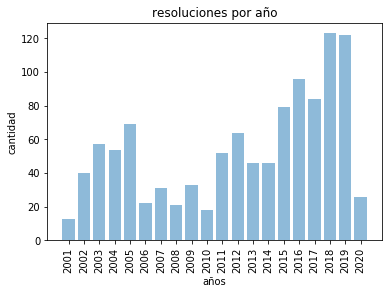

In [5]:
#Resoluciones por año
resoaño=df.groupby(["año"])["Resumen"].count()
plt.bar(resoaño.index,resoaño, align='center', alpha=0.5)
plt.xticks(resoaño.index, rotation="vertical")
plt.ylabel('cantidad')
plt.xlabel('años')
plt.title('resoluciones por año')
plt.show()

# Ajustando parámetros y análisis de datos


In [6]:
df=pd.read_excel('rd.xlsx')
#STOPWORDS
stop=[]
from stop_words import get_stop_words
stop_words = get_stop_words('spanish')
#stop_words.append()

#numero de topicos óptimo
#num_topics=10

#año
año=2019

#nombre
nombre=f"rd{año}.html"

In [7]:
#df=df[df["año"]==año]

In [8]:
df

,Resolución,Fecha,Resumen,Categoria,LINK,año
0,SIE-11-2001,2001-09-11,Tipificación de la Violación por Cambio Unilat...,Tarifa,https://portal.sie.gov.do:17109/DR/Shared%20Do...,2001
1,SIE-13-2001,2001-09-28,Rechaza Recurso de Reconsideración sobre Petic...,Recurso de Reconsideración ante Consejo SIE,https://portal.sie.gov.do:17109/DR/Shared%20Do...,2001
2,SIE-14-2001,2001-09-29,Ordena a las Ede´s a Aplicar los descuentos de...,Tarifa,https://portal.sie.gov.do:17109/DR/Shared%20Do...,2001
3,SIE-16-2001,2001-10-10,Establecimiento del Costo Marginal de la Poten...,Costo Marginal Corto Plazo,https://portal.sie.gov.do:17109/DR/Shared%20Do...,2001
4,SIE-18-2001,2001-10-10,Establecimiento de un Ajustador de Combustible...,Tarifa,https://portal.sie.gov.do:17109/DR/Shared%20Do...,2001
...,...,...,...,...,...,...
1091,SIE-018-2020-TF,2020-03-27,Fijación Tarifa Transitoria aplicable a UR Emp...,Tarifa,https://www.sie.gov.do/images/sie-documentos-p...,2020
1092,SIE-022-2020-TF,2020-04-09,Fijación Tarifas a UR CLFLT Abril 2020,Tarifa,https://www.sie.gov.do/images/sie-documentos-p...,2020
1093,SIE-023-2020-PS,2020-04-21,Permiso Interconexión Provisional LT 69 KV San...,Autorizaciones Puesta en Servicio,https://www.sie.gov.do/images/sie-documentos-p...,2020
1094,SIE-025-2020-MEMI,2020-04-21,Modif Res SIE-016-2020-MEMI sobre Inst No Susp...,Normativa Mercado Eléctrico Minorista,https://www.sie.gov.do/images/sie-documentos-p...,2020


## Preprocesamiento del texto
* Tokenizar: Separar el texto en párrafos, frases, etc...
* Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres.
* Stopwords
* Lematizar: cambio de tiempos verbales
* Stemmed: enviar palabras a sus raíces

In [9]:
df.Resumen=df.Resumen.apply(str)
df.Resumen=df.Resumen.str.lower() 
#data2.Resumen=data2.Resumen.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') 
df.Resumen=df.Resumen.str.replace('[0-9]', ' ') 
df.Resumen=df.Resumen.str.replace('reuters', '')
df.Resumen=df.Resumen.str.replace('regulación', '')
df.Resumen=df.Resumen.str.replace('resolución', '')
df.Resumen=df.Resumen.str.replace('factores', '')
df.Resumen=df.Resumen.str.replace('  +', ' ')
df.Resumen=df.Resumen.str.replace('said', '')
df.Resumen=df.Resumen.str.replace('dominicana', '') 
df.Resumen=df.Resumen.str.replace('republica', '') 
df.Resumen=df.Resumen.str.replace("usuarios", "usuario")
df.Resumen=df.Resumen.str.replace("ede", "")
df.Resumen=df.Resumen.str.replace("creg", "")
df.Resumen=df.Resumen.str.replace("resoluciones", "")
df.Resumen=df.Resumen.str.replace("resoluciones", "")
df.Resumen=df.Resumen.str.replace("trilogy", "")
df.Resumen=df.Resumen.str.replace("mhz", "")
df.Resumen=df.Resumen.str.replace("dgt", "")
df.Resumen=df.Resumen.str.replace("favor", "")
df.Resumen=df.Resumen.str.replace("por la cual", "")
df.Resumen=df.Resumen.str.replace("jd", "")
df.Resumen=df.Resumen.str.replace("mayo", "")

In [10]:
df

,Resolución,Fecha,Resumen,Categoria,LINK,año
0,SIE-11-2001,2001-09-11,tipificación de la violación por cambio unilat...,Tarifa,https://portal.sie.gov.do:17109/DR/Shared%20Do...,2001
1,SIE-13-2001,2001-09-28,rechaza recurso de reconsideración sobre petic...,Recurso de Reconsideración ante Consejo SIE,https://portal.sie.gov.do:17109/DR/Shared%20Do...,2001
2,SIE-14-2001,2001-09-29,ordena a las ´s a aplicar los descuentos de % ...,Tarifa,https://portal.sie.gov.do:17109/DR/Shared%20Do...,2001
3,SIE-16-2001,2001-10-10,establecimiento del costo marginal de la poten...,Costo Marginal Corto Plazo,https://portal.sie.gov.do:17109/DR/Shared%20Do...,2001
4,SIE-18-2001,2001-10-10,establecimiento de un ajustador de combustible...,Tarifa,https://portal.sie.gov.do:17109/DR/Shared%20Do...,2001
...,...,...,...,...,...,...
1091,SIE-018-2020-TF,2020-03-27,fijación tarifa transitoria aplicable a ur emp...,Tarifa,https://www.sie.gov.do/images/sie-documentos-p...,2020
1092,SIE-022-2020-TF,2020-04-09,fijación tarifas a ur clflt abril,Tarifa,https://www.sie.gov.do/images/sie-documentos-p...,2020
1093,SIE-023-2020-PS,2020-04-21,permiso interconexión provisional lt kv san ju...,Autorizaciones Puesta en Servicio,https://www.sie.gov.do/images/sie-documentos-p...,2020
1094,SIE-025-2020-MEMI,2020-04-21,modif res sie- - -memi sobre inst no suspensió...,Normativa Mercado Eléctrico Minorista,https://www.sie.gov.do/images/sie-documentos-p...,2020


In [11]:
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=stop_words, ngram_range=(1,3), analyzer="word") # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(df.Resumen) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario
tf = tf_vectorizer.fit_transform(df.Resumen.head(100)) # Aplico el objeto a un conjunto de texto

In [12]:
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario

In [13]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # Vuelvo de sparse a densa para explorarla
TF_detallada.head() #Veo las primeras 5 filas
#print(TF_detallada.shape) # Veo las dimensiones, a qué corresponden?

,abr,acoger,acoger recurso,acoger recurso reconsideración,aislados,aplicación,artículo,autorización,autorización ejercer,autorización ejercer condición,...,usuario regulado parque,usuario regulado zona,vad,valores,violación,violación cambio,violación cambio unilateral,zona,zona franca,zona franca industrial
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# ¿Que tal si estudiamos las frecuencias de las palabras?
#frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
#frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
#frecuencias.head(15)
#frecuencias.head(30).plot(kind='bar', figsize=(12,6))

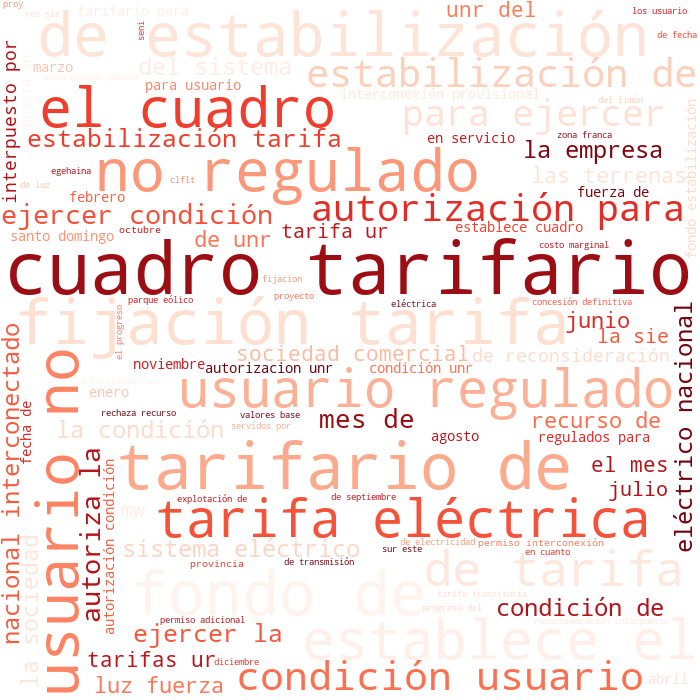

In [15]:
cloud=WordCloud(background_color='white', width=700, height=700, max_words=100, max_font_size=300, stopwords=tf_vectorizer.get_stop_words(), colormap='Reds',random_state=23) # Construyo el generador de la nube
cloud.generate('.'.join(list(df.Resumen))) # Genero la nube
cloud.to_image() # Despliego la imagen de la nube
# Para ver las gamas de colores vea: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Para ver más parámetros de la nube de palabras: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

# MODELO GENERAL - TODOS LOS AÑOS

In [22]:
num_topics=6

In [23]:
# Cuántos tópicos deseo
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
lda.fit(tf) # Estimo el LDA
#print(lda.components_.shape) # De que tma~no es el resultado?
#lda.components_ # Exploremos el resultado

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.1,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=6, n_jobs=-1,
                          perp_tol=0.1, random_state=23, topic_word_prior=0.1,
                          total_samples=1000000.0, verbose=1)

In [24]:
print_topics(lda, tf_vectorizer, 15) # Veo las 15 palabras más importantes de cada tópico


Topic #0:
regulado, usuario regulado, usuario, condición usuario regulado, condición usuario, condición, ejercer condición usuario, ejercer condición, ejercer, autorización ejercer condición, autorización ejercer, autorización, industrial, franca, zona

Topic #1:
costo, plazo, energía, establecimiento, máximo, plazo barra, corto plazo, energía corto plazo, energía corto, máximo energía corto, máximo energía, desabastecimiento, costo marginal máximo, marginal máximo energía, corto plazo barra

Topic #2:
tarifario, cuadro tarifario, cuadro, ordena, tarifa, establecimiento, energía, tarifario ene, cuadro tarifario ene, ene, sistemas aislados, sistemas, aislados, instalación, superior

Topic #3:
tarifa, usuario, tipificación, tipificación violación, usuario parte, violación, tarifa usuario, parte, tarifa usuario parte, unilateral tarifa usuario, cambio unilateral tarifa, unilateral, unilateral tarifa, tipificación violación cambio, cambio

Topic #4:
establecimiento, indexación, fórmula in

## Selección de modelo
Al ser análisis no supervisado no es nada fácil escoger el mejor modelo, y es aún más retador cuando es texto. Tenemos una aproximación, la máxima verosimilitud

Wall time: 3.69 s


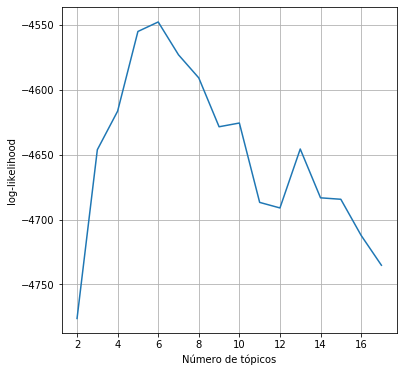

In [25]:
%%time
# Juguemos con un hiper parámetro
likelihood=[]
values=[i for i in range(2,18,1)]
for i in values:
    modelo = LatentDirichletAllocation(n_components=i, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23) # Construyo el objeto que es el modelo
    modelo.fit(tf)
    likelihood.append(modelo.score(tf))
# Visualizamos
plt.figure(figsize=(6,6))
plt.plot(values, likelihood)
plt.xlabel('Número de tópicos')
plt.ylabel('log-likelihood')
plt.grid()

## Visualización del LDA

In [26]:
LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) # Preparo el modelo y sus resultados para la visualización
pyLDAvis.save_html(LDAvis_prepared, nombre) # Guardo la visualización como html"""

C:\Users\Jorge Guerra\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [27]:
pyLDAvis.display(LDAvis_prepared) # Lo visualizo dentro del notebook